# RFM MODEL

Lượng hóa RFM (Recency, Frequency, Monetary) là quá trình gán điểm số cho từng khách hàng dựa trên ba yếu tố này. Dưới đây là hướng dẫn chi tiết từng bước để thực hiện:

---

## **1. Chuẩn bị dữ liệu**
Dữ liệu cần bao gồm ít nhất các cột:
- **Customer ID:** Mã khách hàng  
- **Order Date:** Ngày giao dịch  
- **Order Amount:** Giá trị đơn hàng  

---

## **2. Tính các chỉ số RFM**

### **Recency (Gần đây)**
- Đo khoảng thời gian từ lần mua hàng gần nhất đến một mốc thời gian tham chiếu (thường là ngày hiện tại).  
- Công thức:  
\[
Recency = \text{{Ngày tham chiếu}} - \text{{Ngày mua hàng gần nhất}}
\]

### **Frequency (Tần suất)**
- Đếm số lần khách hàng đã giao dịch trong một khoảng thời gian xác định.  
- Công thức:  
\[
Frequency = \text{{Số đơn hàng}}
\]

### **Monetary (Giá trị)**
- Tổng số tiền mà khách hàng đã chi tiêu.  
- Công thức:  
\[
Monetary = \sum (\text{{Giá trị đơn hàng}})
\]

---

## **3. Chấm điểm RFM**

- Chia từng tiêu chí thành các nhóm, thường là 3, 4 hoặc 5 bậc (quintile).  
- Xếp hạng theo percentiles:  
  - Recency: **Điểm thấp hơn cho thời gian xa hơn, cao hơn cho gần đây.**  
  - Frequency & Monetary: **Điểm thấp hơn cho giá trị nhỏ hơn, cao hơn cho giá trị lớn hơn.**

Ví dụ, nếu chia thành 5 nhóm:
- Recency: **1** (xa nhất), **5** (gần nhất)  
- Frequency: **1** (ít nhất), **5** (nhiều nhất)  
- Monetary: **1** (thấp nhất), **5** (cao nhất)  

---

## **4. Kết hợp điểm RFM**

- Tạo **RFM Score** bằng cách ghép ba điểm lại với nhau.  
- Ví dụ:  
  - Recency = 4, Frequency = 5, Monetary = 3 → **RFM Score = 453**

Hoặc tính tổng điểm:  
\[
RFM\_Score = Recency + Frequency + Monetary
\]

---

## **5. Phân khúc khách hàng theo RFM Score**

Dựa trên điểm RFM, chia khách hàng thành các nhóm như sau:

| RFM Score      | Phân khúc                  | Đặc điểm                                                  |
|----------------|-----------------------------|------------------------------------------------------------|
| 555, 554, 545 | **Khách hàng VIP**           | Mua hàng nhiều, thường xuyên, chi tiêu cao                 |
| 444, 443, 434 | **Khách hàng trung thành**   | Mua hàng đều đặn, giá trị khá cao                          |
| 355, 344, 335 | **Khách hàng tiềm năng**     | Giao dịch gần đây, có khả năng trở thành VIP               |
| 211, 111, 121 | **Khách hàng sắp rời bỏ**    | Đã lâu không mua hàng, chi tiêu thấp                       |
| 533, 522, 511 | **Khách hàng mới**           | Mới mua gần đây, nhưng chưa có tần suất và giá trị cao     |

---

## **6. Ứng dụng kết quả**
- **Tiếp thị cá nhân hóa:** Gửi khuyến mãi đặc biệt cho từng nhóm.  
- **Tối ưu chăm sóc:** Chú trọng nhóm VIP, chăm sóc nhóm sắp rời bỏ.  
- **Dự đoán hành vi:** Xác định khách hàng có nguy cơ rời bỏ để kịp thời can thiệp.  

---

# RFM MACHINE LEARNING

## Import

In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import datetime
import sys 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

sys.path.append("..")


In [2]:
df = pd.read_excel('./data/raw/RFM_data.xlsx')
df.describe()


In [5]:
df_not_nan = df[df['CustomerID'].notna()]
df_not_nan = df_not_nan.sample(20000, random_state=42)
df_not_nan.head(10)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
47912,540456,48185,DOORMAT FAIRY CAKE,2,2011-01-07 12:14:00,7.95,13534.0,United Kingdom
342630,566891,23013,GLASS APOTHECARY BOTTLE TONIC,4,2011-09-15 13:51:00,3.95,14894.0,United Kingdom
288183,C562139,21313,GLASS HEART T-LIGHT HOLDER,-4,2011-08-03 10:10:00,0.85,12921.0,United Kingdom
325368,565438,22382,LUNCH BAG SPACEBOY DESIGN,4,2011-09-04 13:56:00,1.65,17229.0,United Kingdom
331450,566016,21212,PACK OF 72 RETROSPOT CAKE CASES,24,2011-09-08 12:20:00,0.55,15144.0,United Kingdom
234751,557598,22558,CLOTHES PEGS RETROSPOT PACK 24,2,2011-06-21 11:33:00,1.65,14667.0,United Kingdom
283269,561704,21533,RETROSPOT LARGE MILK JUG,1,2011-07-29 11:07:00,4.95,14606.0,United Kingdom
532936,581001,22726,ALARM CLOCK BAKELIKE GREEN,24,2011-12-07 08:07:00,3.75,12583.0,France
78561,542890,84865,NEW BAROQUE BLACK PHOTO ALBUM,2,2011-02-01 13:25:00,8.50,15311.0,United Kingdom
424855,573287,21314,SMALL GLASS HEART TRINKET POT,8,2011-10-28 14:42:00,2.10,14194.0,United Kingdom


In [6]:
df_not_nan["InvoiceDate"] = pd.to_datetime(df_not_nan["InvoiceDate"], format='%Y-%m-%d %H:%M:%S')
current_date = max(df_not_nan['InvoiceDate']) + datetime.timedelta(days=1)
max(df_not_nan['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [7]:
df_not_nan["TotalPay"]= df_not_nan["Quantity"] * df_not_nan["UnitPrice"]
df_customers = df_not_nan.groupby(['CustomerID']).agg(
    {'InvoiceDate': lambda x: (current_date - x.max()).days,
    'InvoiceNo':'count',
    'TotalPay':'sum'
    }
)
df_customers.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','TotalPay':'MonetaryValue'}, inplace=True)
df_customers

,Recency,Frequency,MonetaryValue
CustomerID,,,
12347.0,40,11,233.40
12348.0,249,4,282.64
12349.0,19,4,338.55
12352.0,36,10,164.90
12353.0,204,1,17.70
...,...,...,...
18272.0,3,19,358.12
18274.0,18,3,15.15
18281.0,181,1,15.30


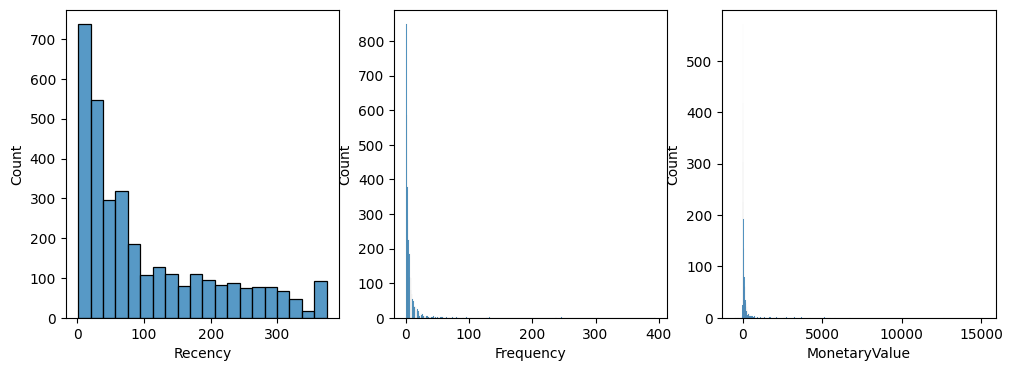

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(12,4))
sns.histplot(df_customers['Recency'], ax = ax[0])
sns.histplot(df_customers['Frequency'], ax = ax[1])
sns.histplot(df_customers['MonetaryValue'], ax = ax[2])
plt.show()

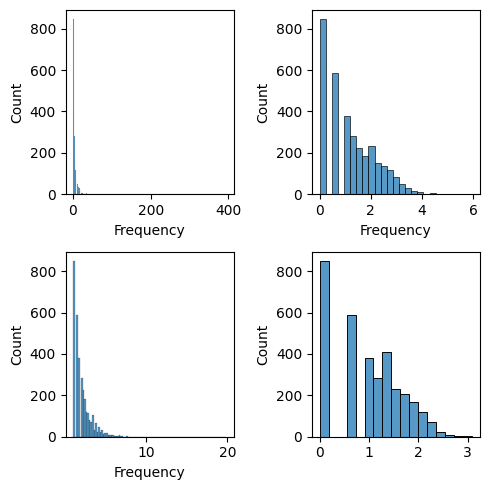

16.31
0.56
3.49
0.08


In [9]:

def analyze_skewness(x):
    fig, ax = plt.subplots(2, 2, figsize=(5,5))
    sns.histplot(x, ax=ax[0,0])
    sns.histplot(np.log(x), ax=ax[0,1])
    sns.histplot(np.sqrt(x), ax=ax[1,0])
    sns.histplot(stats.boxcox(x)[0], ax=ax[1,1])
    plt.tight_layout()
    plt.show()
    
    print(x.skew().round(2))
    print(np.log(x).skew().round(2))
    print(np.sqrt(x).skew().round(2))
    print(pd.Series(stats.boxcox(x)[0]).skew().round(2))


analyze_skewness(df_customers['Frequency'])

In [ ]:
df_customers_trans = pd.DataFrame()
df_customers_trans["Recency"] = stats.boxcox(df_customers["Recency"])[0]
df_customers_trans["Frequency"] = stats.boxcox(df_customers["Frequency"])[0]
df_customers_trans["MonetaryValue"] = pd.Series(df_customers["MonetaryValue"]).values

scaler = StandardScaler()
scaler.fit(df_customers_trans)

df_customers_trans = scaler.transform(df_customers_trans)
df_customers_trans = pd.DataFrame(df_customers_trans)
df_customers_trans.head()

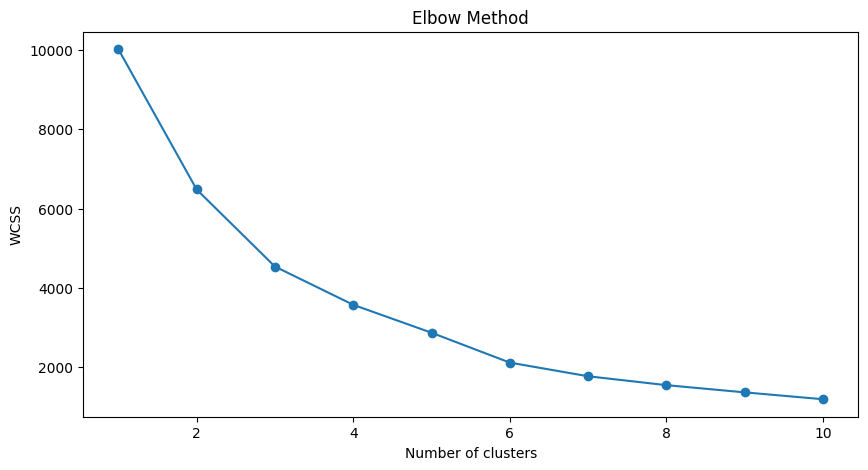

In [13]:


# Tính WCSS cho các giá trị K từ 1 đến 10
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df_customers_trans)
    wcss.append(kmeans.inertia_)

# Vẽ biểu đồ Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Biểu đồ trên là biểu đồ Elbow Method, được sử dụng để xác định số lượng cụm (clusters) tối ưu trong thuật toán K-Means. Trục x biểu diễn số lượng cụm (từ 1 đến 10) và trục y biểu diễn Within-Cluster Sum of Squares (WCSS), là tổng bình phương khoảng cách từ mỗi điểm dữ liệu đến centroid của cụm mà nó thuộc về.

Trong biểu đồ này, bạn sẽ thấy rằng khi số lượng cụm tăng lên, WCSS giảm dần. Tuy nhiên, sau một điểm nào đó, tốc độ giảm của WCSS bắt đầu chậm lại. Điểm mà tốc độ giảm bắt đầu chậm lại được gọi là "elbow" (khuỷu tay), và số lượng cụm tại điểm này thường được chọn là số lượng cụm tối ưu.

Trong biểu đồ của bạn, "elbow" có thể nằm ở khoảng 3 hoặc 4 cụm, vì sau điểm này, tốc độ giảm của WCSS bắt đầu chậm lại rõ rệt.

In [ ]:
# Tạo mô hình KMeans với K=3
kmeans_4 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans_4.fit(df_customers_trans)

# Gán nhãn cụm cho từng khách hàng
df_customers['Cluster'] = kmeans_4.labels_

# Hiển thị kết quả
df_customers.head(10)

,Recency,Frequency,MonetaryValue,Cluster
CustomerID,,,,
12347.0,40,11,233.40,1
12348.0,249,4,282.64,2
12349.0,19,4,338.55,1
12352.0,36,10,164.90,1
12353.0,204,1,17.70,2
12354.0,232,2,33.30,2
12356.0,23,4,178.05,1
12357.0,33,7,405.27,1
12358.0,151,1,80.00,2


In [ ]:
df_clustered = df_customers.groupby('Cluster').mean()[['Recency', 'Frequency', 'MonetaryValue']]
print(df_clustered)

            Recency  Frequency  MonetaryValue
Cluster                                      
0         45.609954   1.782407      38.098067
1         32.782541  11.727981     191.268161
2        220.489020   2.459459      53.265448
3         15.142857  71.571429    7895.692857


## Phân tích Cụm


### Kết luận

1. **Cụm 0**: Khách hàng trong cụm này có tần suất mua hàng thấp và giá trị đơn hàng trung bình thấp. Họ có thể là những khách hàng không thường xuyên mua sắm.
2. **Cụm 1**: Khách hàng trong cụm này có tần suất mua hàng cao hơn và giá trị đơn hàng trung bình cao hơn so với cụm 0. Họ có thể là những khách hàng trung thành và có giá trị.
3. **Cụm 2**: Khách hàng trong cụm này có thời gian mua hàng gần nhất xa nhất, tần suất mua hàng thấp và giá trị đơn hàng trung bình thấp. Họ có thể là những khách hàng đã lâu không mua sắm và có nguy cơ rời bỏ.
4. **Cụm 3**: Khách hàng trong cụm này có tần suất mua hàng rất cao và giá trị đơn hàng trung bình rất cao. Họ có thể là những khách hàng VIP và rất quan trọng đối với doanh nghiệp.

In [ ]:
# Define quantiles
quantiles = df_customers.quantile(q=[0.2, 0.4, 0.6, 0.8]).to_dict()

# Function to assign RFM scores
def RScore(x, p, d):
    if x <= d[p][0.2]:
        return 1
    elif x <= d[p][0.4]:
        return 2
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 4
    else:
        return 5

def FMScore(x, p, d):
    if x <= d[p][0.2]:
        return 5
    elif x <= d[p][0.4]:
        return 4
    elif x <= d[p][0.6]:
        return 3
    elif x <= d[p][0.8]:
        return 2
    else:
        return 1

# Create RFM segmentation table
df_customers['R'] = df_customers['Recency'].apply(RScore, args=('Recency', quantiles,))
df_customers['F'] = df_customers['Frequency'].apply(FMScore, args=('Frequency', quantiles,))
df_customers['M'] = df_customers['MonetaryValue'].apply(FMScore, args=('MonetaryValue', quantiles,))

# Combine RFM score
df_customers['RFM_Score'] = df_customers['R'].map(str) + df_customers['F'].map(str) + df_customers['M'].map(str)

# Display the RFM segmentation table
df_customers.head(10)

,Recency,Frequency,MonetaryValue,Cluster,R,F,M,RFM_Score
CustomerID,,,,,,,,
12347.0,40,11,233.40,1,2,1,1,211
12348.0,249,4,282.64,2,5,3,1,531
12349.0,19,4,338.55,1,2,3,1,231
12352.0,36,10,164.90,1,2,1,1,211
12353.0,204,1,17.70,2,5,5,4,554
12354.0,232,2,33.30,2,5,4,3,543
12356.0,23,4,178.05,1,2,3,1,231
12357.0,33,7,405.27,1,2,2,1,221
12358.0,151,1,80.00,2,4,5,2,452


In [ ]:
# Filter customers with RFM_Score '111'
best_customers = df_customers[df_customers['RFM_Score'] == '111']

# Sort by MonetaryValue in descending order
best_customers = best_customers.sort_values(by='MonetaryValue', ascending=False)

# Get the top 5 best customers
top_5_best_customers = best_customers.head(5)

# Display the top 5 best customers
top_5_best_customers

,Recency,Frequency,MonetaryValue,Cluster,R,F,M,RFM_Score
CustomerID,,,,,,,,
17450.0,18,17,15130.44,3,1,1,1,111
14646.0,2,96,12687.00,3,1,1,1,111
18102.0,1,18,5499.24,3,1,1,1,111
16013.0,8,9,5143.30,3,1,1,1,111
14911.0,1,304,4250.65,3,1,1,1,111
